In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
from tkinter import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('fish_data.csv')

## 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


## 2. Find Shape Fish Dataset (Number of Rows And Number of Columns)

In [4]:
data.shape

(1000, 6)

## 3. Check Null Values In The Dataset

In [5]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [6]:
data.describe()

,Price,Actual Price
count,1000.000000,1000.000000
mean,35555.479000,47964.664000
std,36934.953043,42335.285309
min,63.000000,63.000000
25%,14477.500000,25000.000000
50%,27968.500000,41543.500000
75%,45612.750000,60047.500000
max,403200.000000,280000.000000


In [7]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 113330,
 112000,
 112000,
 109906,
 101694,
 100800,
 100667,
 100539,
 98176,
 96000,
 96000,
 95466,
 92160,
 89600,
 89538,
 87465,
 86896,
 86795,
 86400,
 86400,
 85281,
 84574,
 84000,
 84000,
 84000,
 83680,
 82535,
 80640,
 80083,
 80000,
 79936,
 79917,
 79778,
 79644,
 79521,
 79200,
 78826,
 77922,
 76800,
 76800,
 76800,
 76537,
 76316,
 75739,
 75516,
 75468,
 75331,
 75138,
 74751,
 74087,
 73922,
 73893,
 73314,
 72894,
 72825,
 72695,
 72452,
 72187,
 72000,
 72000,
 72000,
 72000,
 71802,
 71672,
 71040,
 70885,
 70683,
 70032,
 70000,
 69968,
 69911,
 69333,
 69240,
 69180,
 69140,
 69120,
 69120,
 68909,
 68685,
 68628,
 68544,
 68187,
 68111,
 68088,
 67795,
 67694,
 67431,
 67200,
 67200,
 67200,
 67200,
 66936,
 66816,
 66702,
 66639,
 66278,
 66000,
 66000,
 65960,
 65774,
 65546,
 652

## 4. Encoding the Categorical Columns

In [8]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [9]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [10]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [11]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

## 5. Transform the 'Actual Price' and 'Price' columns in the data DataFrame using MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [13]:
joblib.dump(scaler, 'actual_price_scaler.pkl')
joblib.dump(scaler2, 'price_scaler.pkl')

['price_scaler.pkl']

In [14]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.089143,1,3,1,0.106942
1,1,0.178443,1,3,1,0.214109
2,2,0.074260,1,3,1,0.089081
3,3,0.163560,1,3,1,0.196248
4,4,0.074260,1,3,1,0.089081


In [15]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.00

In [16]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.089143,1,3,1,0.106942
1,1,0.178443,1,3,1,0.214109
2,2,0.074260,1,3,1,0.089081
3,3,0.163560,1,3,1,0.196248
4,4,0.074260,1,3,1,0.089081
...,...,...,...,...,...,...
995,5,0.014397,1,0,0,0.043438
996,6,0.017103,1,0,0,0.051562
997,7,0.014119,1,0,0,0.042606
998,8,0.035779,1,0,0,0.107592


## 6. Store Feature Matrix In X and Response(Target) In Vector y

In [17]:
X = data.drop(['Price', 'Fish Species'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Catching Method  Sustainability  Actual Price
0      1                3               1      0.106942
1      1                3               1      0.214109
2      1                3               1      0.089081
3      1                3               1      0.196248
4      1                3               1      0.089081
0    0.089143
1    0.178443
2    0.074260
3    0.163560
4    0.074260
Name: Price, dtype: float64


## 7. Train, Test, Split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
import tensorflow as tf

## Deep Learning Model 

In [23]:
model_using_huber = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(25, activation='relu'),  
    tf.keras.layers.Reshape((5, 5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1)
])

In [24]:
model_using_huber.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [25]:
history4 = model_using_huber.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
25/25 [==============================] - 11s 42ms/step - loss: 0.0049 - mse: 0.0099 - val_loss: 0.0037 - val_mse: 0.0073
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0035 - mse: 0.0071 - val_loss: 0.0031 - val_mse: 0.0062
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0030 - mse: 0.0060 - val_loss: 0.0028 - val_mse: 0.0055
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0026 - mse: 0.0052 - val_loss: 0.0020 - val_mse: 0.0041
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0043 - val_loss: 0.0019 - val_mse: 0.0038
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0017 - mse: 0.0034 - val_loss: 9.2032e-04 - val_mse: 0.0018
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0011 - mse: 0.0023 - val_loss: 5.6573e-04 - val_mse: 0.0011
Epoch 8/100
25/25 [==============================] - 0s 11ms/step -

# XGB Regressor Model

In [26]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [27]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 9. Score Comparison

In [28]:
y_pred1 = model_using_huber.predict(X_test)
score1 = metrics.r2_score(y_test,y_pred1)

y_pred2 = xg.predict(X_test)
score2 = metrics.r2_score(y_test,y_pred2)

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

7/7 [==============================] - 1s 4ms/step


In [29]:
print('R2 Score')
print('Model Huber : ',score1)
print('Model XGB : ',score2)
print('MSE')
print('Model Huber :', mse1)
print('Model XGB :', mse2)

R2 Score
Model Huber :  0.9950839301369079
Model XGB :  0.9962971232663108
MSE
Model Huber : 3.09942274330564e-05
Model XGB : 2.334543788772513e-05


## 10. Data Visualization

In [30]:

import matplotlib.pyplot as plt
import numpy as np

In [31]:
y_test = y_test.to_numpy().reshape(-1, 1)
y_pred1 = y_pred1.reshape(-1, 1)

In [32]:
arr = scaler.inverse_transform(data[['Actual Price']])
arr2 = []
for array in arr :
    arr2.append(array[0])
    
print(arr2)

[30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0,

In [33]:
arr_price = scaler2.inverse_transform(data[['Price']])
arr_price2 = []
for array in arr_price :
    arr_price2.append(array[0])
print(arr_price2)

[36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 84000.0, 36000.0, 336000.0, 72000.0, 45600.0, 43200.0, 86400.0, 36000.0, 79200.0, 36000.0, 115200.0, 100800.0, 43200.0, 403200.0, 86400.0, 54720.00000000001, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 30000.0, 60000.0, 25000.0, 55000.00000000001, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 84000.0, 36000.0, 336000.0, 72000.0, 45600.0, 15000.0, 30000.0, 12500.0, 27500.000000000004, 12500.0, 40000.0, 35000.0, 15000.0, 140000.0, 30000.0, 19000.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 21600.0, 43200.0, 18000.0, 39600.0, 18000.0, 57600.0, 50400.0, 21600.0, 201600.0, 43200.0, 27360.000000000004, 9000.0, 18000.0, 7500.0, 16500.0, 7500.0, 24000.0, 21000.0, 9000.0, 84000.0, 18000.0, 11400.0, 24000.0, 48000.0, 20000.0, 44000.0, 20000.0, 64000.0, 56000.

32/32 [==============================] - 0s 4ms/step


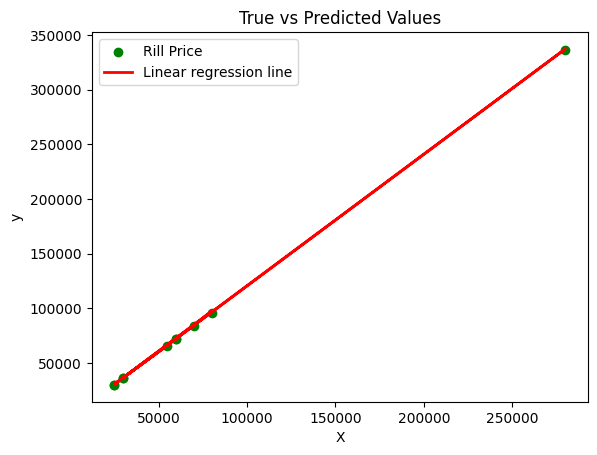

In [34]:
xt = X.T
y_pred_humu = model_using_huber.predict(X)
plt.scatter(arr2[:10], arr_price2[:10], color='green', label='Rill Price')
plt.plot(arr2[:10], scaler2.inverse_transform(y_pred_humu[:10]), color='red', linewidth=2, label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('True vs Predicted Values')
plt.show()

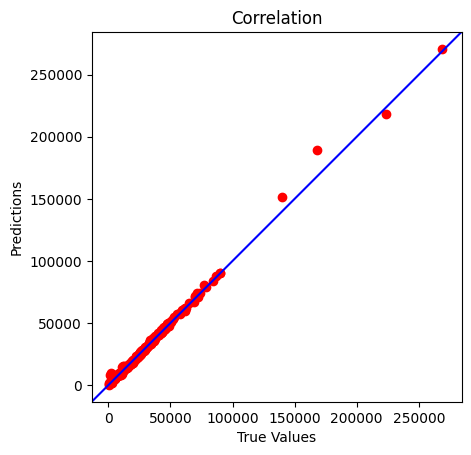

In [35]:
plt.scatter(scaler2.inverse_transform(y_test), scaler2.inverse_transform(y_pred1), color='red')
plt.title('Correlation')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100000000, 100000000], [-100000000, 100000000], color='blue')
plt.show()

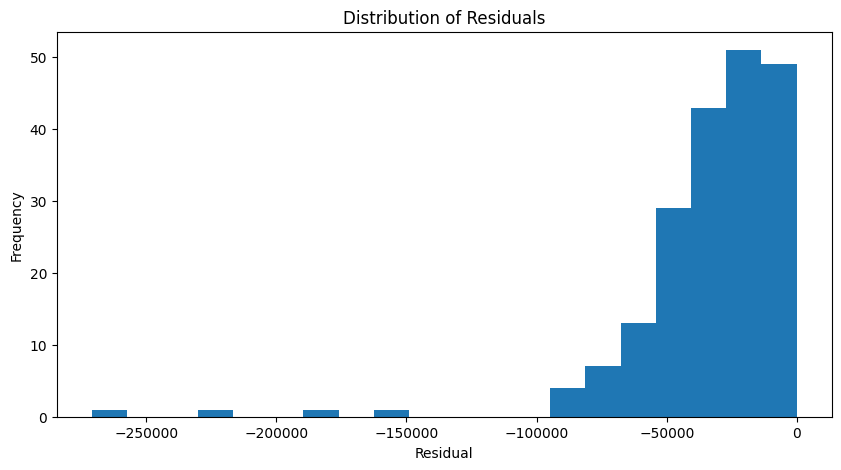

In [36]:
residuals = y_test - scaler2.inverse_transform(y_pred1)

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [37]:
print(X.shape)
print(y.shape)

(1000, 4)
(1000,)


In [38]:
xgb = XGBRegressor()
model_xgb = xgb.fit(X, y)

In [ ]:
# model_using_huber.save('price_predictor_complex_lstm_huber.h5')

In [ ]:
# joblib.dump(model_xgb,'price_predictor_xgb.h5')

In [39]:
import numpy as np
import math

In [40]:
def round_to_multiple(number, multiple):
    towards = multiple * ((number + multiple - 1) // multiple)
    downwards = multiple * (number // multiple)

    if abs(number - towards) < abs(number - downwards):
        return towards
    else:
        return downwards

In [41]:
def predict_price(data, model):
    prediction = model.predict(data)
    prediction = prediction.reshape(-1, 1)  
    prediction = scaler2.inverse_transform(prediction)
    prediction_float = prediction.item()
    rounded_value = round_to_multiple(round(prediction_float, 0),1000)
    
    return rounded_value

In [44]:

data_new = pd.DataFrame({
    'Grade':1,
    'Catching Method':2,
    'Sustainability':1,
    'Actual Price' : 29000

},index=[0])

data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
price1 = predict_price(data_new,model_using_huber)
price2 = predict_price(data_new,model_xgb)

average_price = round_to_multiple((price1+price2)/2, 1000)
result_array = np.array([price1, price2], dtype=int)
    
print(result_array)
print(average_price)

1/1 [==============================] - 0s 25ms/step
[28000 30000]
Rp. 29000.0
